# Generate Synthetic Data

In [1]:
import numpy as np
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

In [2]:
# Generating synthetic data
np.random.seed(0)
data_size = 200
features = np.random.rand(data_size, 2)  # Two features: visit duration and pages visited
labels = (features[:, 0] + features[:, 1] > 1).astype(int)  # Purchase (1) or not (0)

In [3]:
# Convert to DataFrame for easier manipulation
df = pd.DataFrame(features, columns=['VisitDuration', 'PagesVisited'])
df['Purchase'] = labels
df

,VisitDuration,PagesVisited,Purchase
0,0.548814,0.715189,1
1,0.602763,0.544883,1
2,0.423655,0.645894,1
3,0.437587,0.891773,1
4,0.963663,0.383442,1
...,...,...,...
195,0.062713,0.424032,0
196,0.258684,0.849038,1
197,0.033305,0.958983,0
198,0.355369,0.356707,0


# Preprocess the Data

In [4]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(df[['VisitDuration', 'PagesVisited']], df['Purchase'], test_size=0.2, random_state=42)

# Build and Train the Neural Network

In [5]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Define the model
model = Sequential([
    Dense(10, activation='relu', input_shape=(2,)),  # Input layer with 2 features
    Dense(1, activation='sigmoid')  # Output layer with sigmoid activation for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=10, batch_size=10)

Epoch 1/10
16/16 [==============================] - 1s 2ms/step - loss: 0.7190 - accuracy: 0.5437
Epoch 2/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7130 - accuracy: 0.5437
Epoch 3/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7074 - accuracy: 0.5437
Epoch 4/10
16/16 [==============================] - 0s 2ms/step - loss: 0.7030 - accuracy: 0.5437
Epoch 5/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6977 - accuracy: 0.5437
Epoch 6/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6927 - accuracy: 0.5375
Epoch 7/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6882 - accuracy: 0.5375
Epoch 8/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6834 - accuracy: 0.4812
Epoch 9/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6786 - accuracy: 0.4563
Epoch 10/10
16/16 [==============================] - 0s 2ms/step - loss: 0.6737 - accuracy: 0.6125


# Evaluate the Model

In [6]:
# Evaluate the model on the test set
loss, accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {accuracy}")

2/2 [==============================] - 0s 4ms/step - loss: 0.6801 - accuracy: 0.6750
Test Accuracy: 0.675000011920929


# Visualizing Training Process

Epoch 1/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6362 - accuracy: 0.7031 - val_loss: 0.6107 - val_accuracy: 0.7812
Epoch 2/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6327 - accuracy: 0.7109 - val_loss: 0.6054 - val_accuracy: 0.7812
Epoch 3/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6284 - accuracy: 0.7031 - val_loss: 0.5996 - val_accuracy: 0.7812
Epoch 4/10
13/13 [==============================] - 0s 5ms/step - loss: 0.6238 - accuracy: 0.7109 - val_loss: 0.5947 - val_accuracy: 0.7812
Epoch 5/10
13/13 [==============================] - 0s 7ms/step - loss: 0.6197 - accuracy: 0.7344 - val_loss: 0.5891 - val_accuracy: 0.7812
Epoch 6/10
13/13 [==============================] - 0s 8ms/step - loss: 0.6150 - accuracy: 0.7344 - val_loss: 0.5832 - val_accuracy: 0.7812
Epoch 7/10
13/13 [==============================] - 0s 10ms/step - loss: 0.6105 - accuracy: 0.7344 - val_loss: 0.5778 - val_accuracy: 0.8125
Epoch 8/10
13/13 [

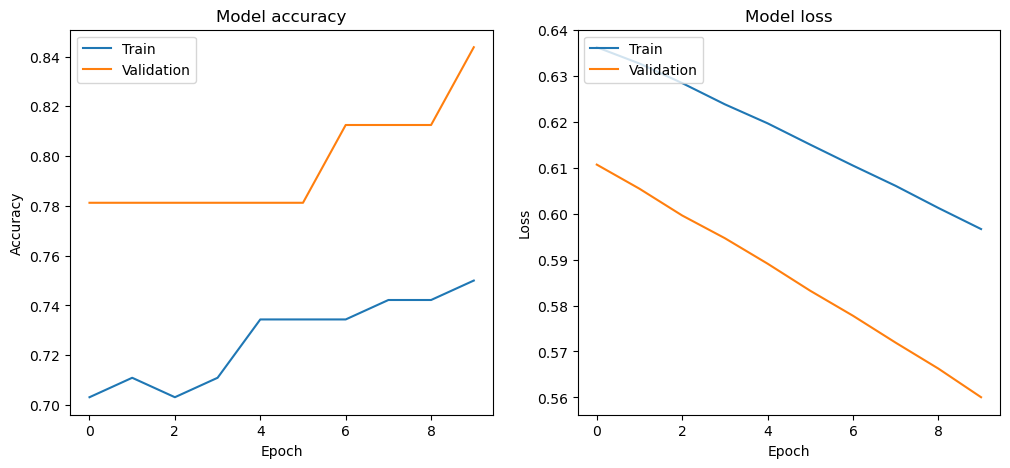

In [9]:
#Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# Train the model and save the history
history = model.fit(X_train, y_train, epochs=10, batch_size=10, validation_split=0.2)

# Plotting training and validation loss and accuracy
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 5))

# Plot training & validation accuracy values
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.show()